## Packages Download/Setup

In [1]:
import os
import json
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import torch
import torch.nn as nn
from torchvision import models, transforms
from transformers import BertTokenizer, BertModel
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score
from torch.utils.data import DataLoader, Subset
import random
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [2]:
from data_loader import VQADataset
from model import AttentionFusionModel, SimpleFusionModel
from trainer import Trainer

## GPU/Directory Setup

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"

Using device: cuda


In [4]:
training_image_dir = 'vqa_data/images/train2014'
training_annotations_path = 'vqa_data/Preprocessed/preprocessed_v2_mscoco_train2014_annotations.json'
training_questions_path = 'vqa_data/Preprocessed/preprocessed_v2_OpenEnded_mscoco_train2014_questions.json'

val_image_dir = 'vqa_data/images/val2014'
val_annotations_path = 'vqa_data/Preprocessed/preprocessed_v2_mscoco_val2014_annotations.json'
val_questions_path = 'vqa_data/Preprocessed/preprocessed_v2_OpenEnded_mscoco_val2014_questions.json'

## Sample Batch Showcase

In [5]:
simple_model_trainer_1 = Trainer(
    training_image_dir,
    training_annotations_path,
    training_questions_path,
    val_image_dir,
    val_annotations_path,
    val_questions_path,
    model_class=SimpleFusionModel
)

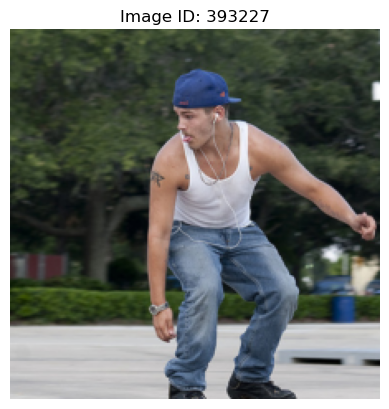

Question ID: 393227002
Question: How many tattoos can be seen on this man's body?
Answer 1: 1 (Label: Correct)
Answer 2: 1 (Label: Correct)
Answer 3: 1 (Label: Correct)
Answer 4: 1 (Label: Correct)
Answer 5: 1 (Label: Correct)
Answer 6: no (Label: Incorrect)
Answer 7: baseball (Label: Incorrect)
Answer 8: yes (Label: Incorrect)
Answer 9: no (Label: Incorrect)
Answer 10: bus (Label: Incorrect)


In [6]:
simple_model_trainer_1.sample_batch(sample_size=1000)

## Model Evaluation

### 1000 data points, model without Attention

In [7]:
simple_1000_metrics = simple_model_trainer_1.train(num_epochs=5, sample_size=1000,showing_batch_size=10)

A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Pl

Starting Epoch 1/5
Batch [0/16], Loss: 0.7001
Batch [10/16], Loss: 0.6992
Epoch [1/5] - Train Loss: 0.6955, Train Accuracy: 0.5081, Val Loss: 0.6917, Val Accuracy: 0.5280
Starting Epoch 2/5
Batch [0/16], Loss: 0.6868
Batch [10/16], Loss: 0.7014
Epoch [2/5] - Train Loss: 0.6933, Train Accuracy: 0.5201, Val Loss: 0.6842, Val Accuracy: 0.5384
Starting Epoch 3/5
Batch [0/16], Loss: 0.6957
Batch [10/16], Loss: 0.6833
Epoch [3/5] - Train Loss: 0.6904, Train Accuracy: 0.5318, Val Loss: 0.6799, Val Accuracy: 0.5360
Starting Epoch 4/5
Batch [0/16], Loss: 0.6899
Batch [10/16], Loss: 0.6907
Epoch [4/5] - Train Loss: 0.6870, Train Accuracy: 0.5372, Val Loss: 0.6760, Val Accuracy: 0.5557
Starting Epoch 5/5
Batch [0/16], Loss: 0.6862
Batch [10/16], Loss: 0.6726
Epoch [5/5] - Train Loss: 0.6798, Train Accuracy: 0.5578, Val Loss: 0.6671, Val Accuracy: 0.6155
Training completed successfully.


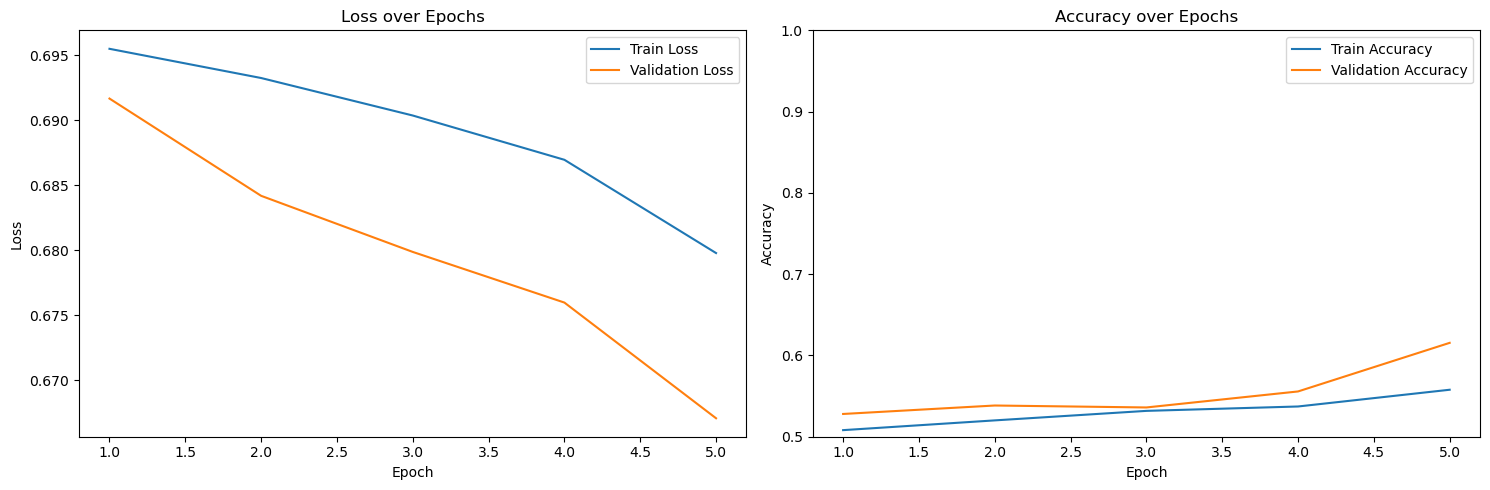

In [8]:
simple_model_trainer_1.plot_training_metrics()

### 10000 data points, model without Attention

In [9]:
simple_model_trainer_2 = Trainer(
    training_image_dir,
    training_annotations_path,
    training_questions_path,
    val_image_dir,
    val_annotations_path,
    val_questions_path,
    model_class=SimpleFusionModel
)

In [10]:
simple_10000_metrics = simple_model_trainer_2.train(num_epochs=5, sample_size=10000,showing_batch_size=50)

A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Pl

Starting Epoch 1/5
Batch [0/157], Loss: 0.7003
Batch [50/157], Loss: 0.6955
Batch [100/157], Loss: 0.6873
Batch [150/157], Loss: 0.6797
Epoch [1/5] - Train Loss: 0.6905, Train Accuracy: 0.5256, Val Loss: 0.6529, Val Accuracy: 0.6233
Starting Epoch 2/5
Batch [0/157], Loss: 0.6667
Batch [50/157], Loss: 0.6085
Batch [100/157], Loss: 0.5339
Batch [150/157], Loss: 0.4946
Epoch [2/5] - Train Loss: 0.5845, Train Accuracy: 0.7093, Val Loss: 0.4769, Val Accuracy: 0.7702
Starting Epoch 3/5
Batch [0/157], Loss: 0.4791
Batch [50/157], Loss: 0.4638
Batch [100/157], Loss: 0.4471
Batch [150/157], Loss: 0.4760
Epoch [3/5] - Train Loss: 0.4715, Train Accuracy: 0.7689, Val Loss: 0.4450, Val Accuracy: 0.7738
Starting Epoch 4/5
Batch [0/157], Loss: 0.4641
Batch [50/157], Loss: 0.4637
Batch [100/157], Loss: 0.4914
Batch [150/157], Loss: 0.4665
Epoch [4/5] - Train Loss: 0.4449, Train Accuracy: 0.7731, Val Loss: 0.4394, Val Accuracy: 0.7732
Starting Epoch 5/5
Batch [0/157], Loss: 0.4360
Batch [50/157], Loss:

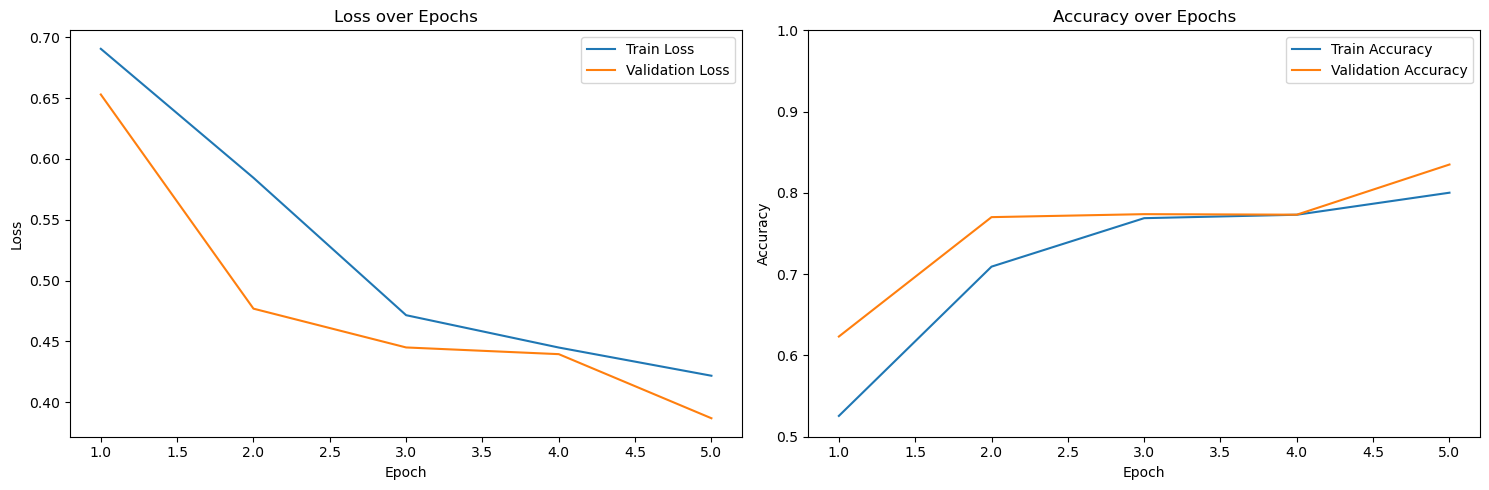

In [11]:
simple_model_trainer_2.plot_training_metrics()

### 100000 data points, model without attention

In [12]:
simple_model_trainer_3 = Trainer(
    training_image_dir,
    training_annotations_path,
    training_questions_path,
    val_image_dir,
    val_annotations_path,
    val_questions_path,
    model_class=SimpleFusionModel
)

In [13]:
simple_100000_metrics = simple_model_trainer_3.train(num_epochs=5, sample_size=100000,showing_batch_size=100)

A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Pl

Starting Epoch 1/5
Batch [0/1563], Loss: 0.6983
Batch [100/1563], Loss: 0.6824
Batch [200/1563], Loss: 0.5036
Batch [300/1563], Loss: 0.4473
Batch [400/1563], Loss: 0.4419
Batch [500/1563], Loss: 0.4512
Batch [600/1563], Loss: 0.4065
Batch [700/1563], Loss: 0.3661
Batch [800/1563], Loss: 0.3079
Batch [900/1563], Loss: 0.3553
Batch [1000/1563], Loss: 0.3947
Batch [1100/1563], Loss: 0.3057
Batch [1200/1563], Loss: 0.3134
Batch [1300/1563], Loss: 0.3118
Batch [1400/1563], Loss: 0.3044
Batch [1500/1563], Loss: 0.3206
Epoch [1/5] - Train Loss: 0.4079, Train Accuracy: 0.8099, Val Loss: 0.3980, Val Accuracy: 0.8270
Starting Epoch 2/5
Batch [0/1563], Loss: 0.2714
Batch [100/1563], Loss: 0.3040
Batch [200/1563], Loss: 0.3355
Batch [300/1563], Loss: 0.2998
Batch [400/1563], Loss: 0.2966
Batch [500/1563], Loss: 0.3045
Batch [600/1563], Loss: 0.2959
Batch [700/1563], Loss: 0.3915
Batch [800/1563], Loss: 0.3214
Batch [900/1563], Loss: 0.3034
Batch [1000/1563], Loss: 0.2897
Batch [1100/1563], Loss: 

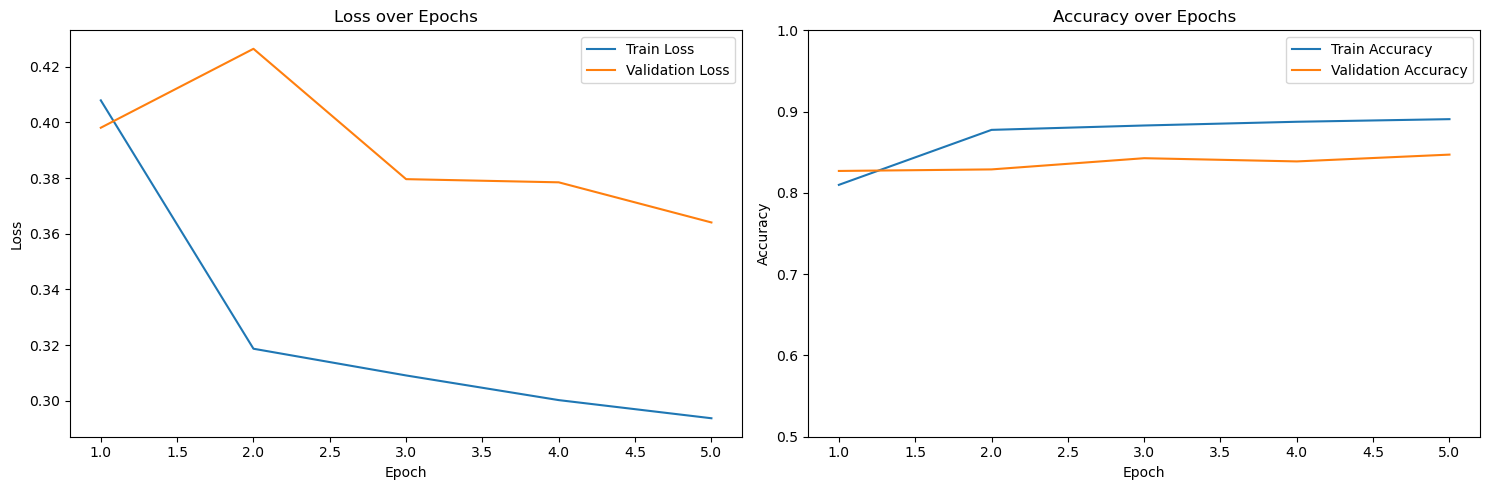

In [14]:
simple_model_trainer_3.plot_training_metrics()

### 1000 data points, model with attention

In [15]:
attention_model_trainer_1 = Trainer(
    training_image_dir,
    training_annotations_path,
    training_questions_path,
    val_image_dir,
    val_annotations_path,
    val_questions_path,
    model_class=AttentionFusionModel
)

In [16]:
attention_1000_metrics = attention_model_trainer_1.train(num_epochs=5, sample_size=1000,showing_batch_size=20)

A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Pl

Starting Epoch 1/5
Batch [0/16], Loss: 0.6959
Epoch [1/5] - Train Loss: 0.6937, Train Accuracy: 0.5042, Val Loss: 0.6926, Val Accuracy: 0.5274
Starting Epoch 2/5
Batch [0/16], Loss: 0.6937
Epoch [2/5] - Train Loss: 0.6932, Train Accuracy: 0.5067, Val Loss: 0.6915, Val Accuracy: 0.5499
Starting Epoch 3/5
Batch [0/16], Loss: 0.6909
Epoch [3/5] - Train Loss: 0.6918, Train Accuracy: 0.5262, Val Loss: 0.6887, Val Accuracy: 0.5586
Starting Epoch 4/5
Batch [0/16], Loss: 0.6890
Epoch [4/5] - Train Loss: 0.6900, Train Accuracy: 0.5411, Val Loss: 0.6847, Val Accuracy: 0.5683
Starting Epoch 5/5
Batch [0/16], Loss: 0.6850
Epoch [5/5] - Train Loss: 0.6883, Train Accuracy: 0.5486, Val Loss: 0.6822, Val Accuracy: 0.5708
Training completed successfully.


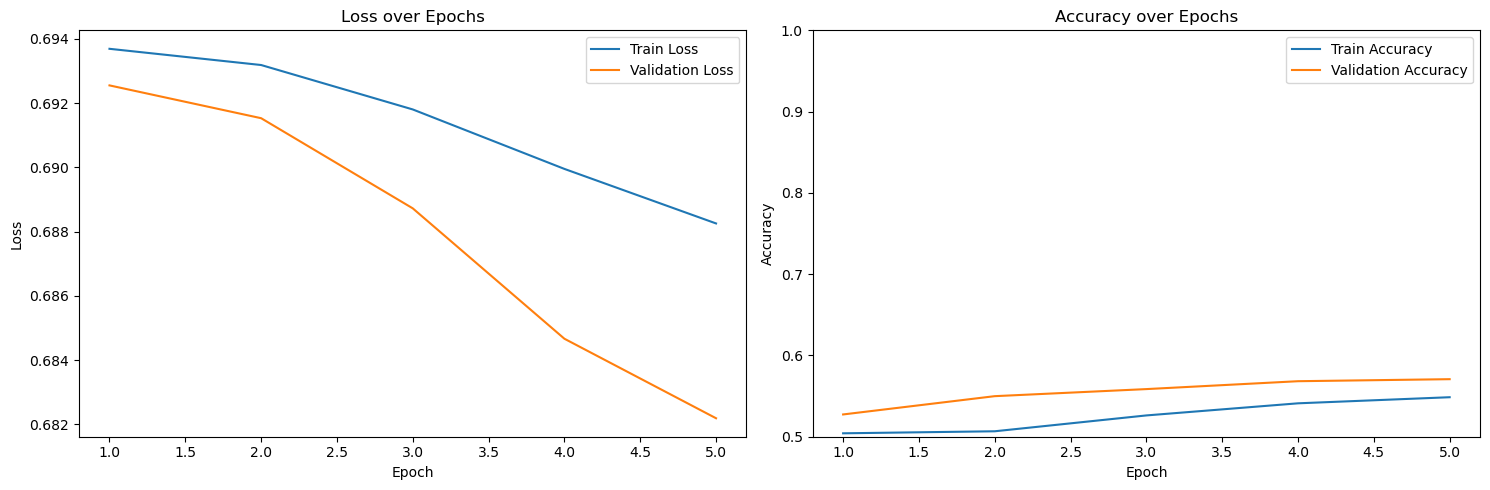

In [17]:
attention_model_trainer_1.plot_training_metrics()

### 10000 data points, model with attention

In [18]:
attention_model_trainer_2 = Trainer(
    training_image_dir,
    training_annotations_path,
    training_questions_path,
    val_image_dir,
    val_annotations_path,
    val_questions_path,
    model_class=AttentionFusionModel
)

In [ ]:
attention_10000_metrics = attention_model_trainer_2.train(num_epochs=5, sample_size=10000,showing_batch_size=50)

A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Pl

Starting Epoch 1/5
Batch [0/157], Loss: 0.6924
Batch [50/157], Loss: 0.6915
Batch [100/157], Loss: 0.6874
Batch [150/157], Loss: 0.6874
Epoch [1/5] - Train Loss: 0.6909, Train Accuracy: 0.5265, Val Loss: 0.6830, Val Accuracy: 0.5424
Starting Epoch 2/5
Batch [0/157], Loss: 0.6804
Batch [50/157], Loss: 0.4944
Batch [100/157], Loss: 0.4944
Batch [150/157], Loss: 0.4374
Epoch [2/5] - Train Loss: 0.5100, Train Accuracy: 0.7350, Val Loss: 0.4416, Val Accuracy: 0.7701
Starting Epoch 3/5
Batch [0/157], Loss: 0.4031
Batch [50/157], Loss: 0.4352
Batch [100/157], Loss: 0.4554
Batch [150/157], Loss: 0.4176
Epoch [3/5] - Train Loss: 0.4279, Train Accuracy: 0.7867, Val Loss: 0.3821, Val Accuracy: 0.8300
Starting Epoch 4/5
Batch [0/157], Loss: 0.3570
Batch [50/157], Loss: 0.3481
Batch [100/157], Loss: 0.3265
Batch [150/157], Loss: 0.3305


In [ ]:
attention_model_trainer_2.plot_training_metrics()

### 100000 data points, model with attention

In [ ]:
attention_model_trainer_3 = Trainer(
    training_image_dir,
    training_annotations_path,
    training_questions_path,
    val_image_dir,
    val_annotations_path,
    val_questions_path,
    model_class=AttentionFusionModel
)

In [ ]:
attention_100000_metrics = attention_model_trainer_3.train(num_epochs=5, sample_size=100000,showing_batch_size=100)

In [ ]:
attention_model_trainer_3.plot_training_metrics()

## Prediction Showcase

A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Pl

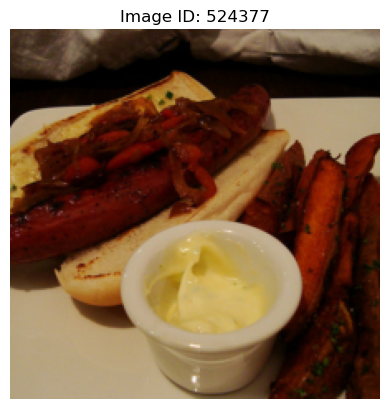

Question ID: 524377019
Question: How many hot dogs are shown?
Answer 1: 1
Label: 1
Prediction: 1

Answer 2: 1
Label: 1
Prediction: 1

Answer 3: 1
Label: 1
Prediction: 1

Answer 4: 1
Label: 1
Prediction: 1

Answer 5: 1
Label: 1
Prediction: 1

Answer 6: floor
Label: 0
Prediction: 1

Answer 7: no
Label: 0
Prediction: 1

Answer 8: no
Label: 0
Prediction: 1

Answer 9: pizza
Label: 0
Prediction: 1

Answer 10: 5
Label: 0
Prediction: 1



In [9]:
trained_model = simple_model_trainer_1.model_class().to(simple_model_trainer_1.device)
simple_model_trainer_1.compare_predictions(trained_model)